In [1]:
import torch

edge_index = torch.load('edge_index.pt')
edge_type = torch.load('edge_type.pt')

edge_index.shape, edge_type.shape

(torch.Size([2, 227979]), torch.Size([227979]))

In [2]:
num_f = torch.load('num_properties_tensor.pt')
num_f.shape

torch.Size([229580, 5])

In [3]:
label = torch.load('label.pt')
label.shape

torch.Size([11826])

In [4]:
train_idx, val_idx, test_idx = torch.load('train_idx.pt'),torch.load('val_idx.pt'),torch.load('test_idx.pt')
train_idx.shape, val_idx.shape, test_idx.shape

(torch.Size([8278]), torch.Size([2365]), torch.Size([1183]))

In [7]:
train_idx

tensor([   0,    1,    2,  ..., 8275, 8276, 8277])

In [9]:
val_idx

tensor([ 8278,  8279,  8280,  ..., 10640, 10641, 10642])

In [8]:
test_idx

tensor([10643, 10644, 10645,  ..., 11823, 11824, 11825])

In [6]:
import os
import sys

# 获取当前工作目录
current_dir = os.getcwd()

# 通过向上导航到项目根目录
project_root = os.path.abspath(current_dir)
print(project_root)
# 将项目根目录添加到系统路径
sys.path.append(project_root)
sys.path.append(project_root+"/slate")

/home/ad/mgao/BotDGT


In [3]:
# preprocess.ipynb
import os
import sys
from torch_geometric.data import Data
import torch
from slate.slate_model import SLATE
from slate.slate_layer import *
from slate.lib.encoding import *

# from importlib import reload
# reload(sys.modules['slate.slate_model'])

# 获取当前工作目录
current_dir = os.getcwd()

# 假设Notebook文件位于 'BotDGT' 目录中
# 通过向上导航到项目根目录
project_root = os.path.abspath(current_dir)
print(project_root)

# 将项目根目录添加到系统路径
sys.path.append(project_root)
sys.path.append(project_root + "/slate")



/home/ad/mgao/BotDGT


In [6]:
import networkx as nx
import random
import pickle
import warnings

warnings.filterwarnings("ignore")
path = '/home/ad/mgao/BotDGT/New/SLATE/notebooks/'
if os.path.exists(path+"f_pickle/toy_dataset.gpickle"):
    with open(path+"f_pickle/toy_dataset.gpickle", "rb") as f:
        sup_G = pickle.load(f)
    # G1 = nx.Graph()
    # G2 = nx.Graph()
    # G3 = nx.Graph()

    # for e in sup_G.edges:
    #     u, v = e
    #     if u < 10:
    #         G1.add_edge(u, v)
    #     elif u < 20:
    #         G2.add_edge(u - 10, v - 10)
    #     else:
    #         G3.add_edge(u - 20, v - 20)
            

In [8]:
sup_G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [9]:
sup_G.edges

EdgeView([(0, 1), (0, 5), (0, 8), (1, 6), (2, 3), (2, 4), (2, 9), (5, 9), (6, 9), (10, 11), (10, 14), (10, 15), (10, 16), (10, 18), (10, 19), (11, 12), (11, 13), (11, 17), (11, 18), (11, 19), (12, 13), (12, 15), (13, 15), (14, 18), (15, 17), (16, 18), (17, 18), (20, 25), (20, 29), (21, 25), (22, 28), (24, 27), (24, 28), (27, 28)])

In [4]:
import torch
sub_G = torch.load('./New/SLATE/slate/data/Twi20/annual_graphs_2008_2020.pt')
sub_G

[Data(edge_index=[2, 1249], edge_type=[1249], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 14946], edge_type=[14946], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 27264], edge_type=[27264], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 45331], edge_type=[45331], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 63063], edge_type=[63063], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 78992], edge_type=[78992], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 95374], edge_ty

In [5]:
len(sub_G)

13

In [6]:
import networkx as nx

def create_graphs_from_sub_G(sub_G):
    graphs = []
    for data in sub_G:
        G = nx.Graph()
        
        # 将 tensor 转换为 numpy 数组，然后再转换为列表
        edge_index = data.edge_index.numpy().T  # 假设 edge_index 是一个 2xN 的 tensor
        edge_type = data.edge_type.numpy().tolist()
        n_id = data.n_id.numpy().tolist()
        
        # 添加节点
        G.add_nodes_from(n_id)
        
        # 添加边及其类型
        for i, (u, v) in enumerate(edge_index):
            G.add_edge(u, v, type=edge_type[i])
        
        graphs.append(G)
    return graphs

graphs = create_graphs_from_sub_G(sub_G)
len(graphs)

13

In [7]:
G1, G2, G3 = graphs[0], graphs[1], graphs[2]
len(G1.nodes),len(G2.nodes),len(G3.nodes)

(229580, 229580, 229580)

In [8]:
G1.edges

EdgeView([(0, 3118), (2, 15007), (3, 8332), (14, 10973), (21, 3553), (29, 9176), (29, 102620), (33, 3488), (33, 4223), (101, 13321), (101, 16035), (103, 3468), (103, 5943), (103, 5992), (103, 10528), (103, 34095), (124, 15564), (147, 9670), (157, 16515), (157, 14767), (165, 13948), (165, 16193), (165, 12077), (165, 14323), (165, 312), (166, 210), (182, 12482), (182, 13341), (182, 12369), (182, 12185), (183, 12007), (183, 8286), (183, 14681), (210, 16268), (224, 5383), (229, 14837), (229, 14477), (229, 12743), (229, 2240), (239, 1960), (241, 15195), (241, 14586), (243, 10701), (287, 12343), (287, 13171), (303, 3596), (316, 3737), (316, 5943), (339, 19457), (339, 20643), (339, 20471), (339, 19784), (339, 102620), (344, 19800), (359, 376), (359, 11503), (376, 20936), (376, 20773), (376, 18940), (376, 20313), (376, 21053), (376, 20901), (376, 17838), (376, 20310), (379, 2109), (379, 4414), (381, 10714), (381, 20746), (381, 8636), (389, 19623), (389, 17316), (389, 17983), (389, 19364), (391

In [117]:
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()

edges1 = [(0, 1), (0, 4), (2, 5), (0, 8), (7, 9), (2, 4), (3, 6)]
for e in edges1:
    G1.add_edge(e[0],e[1])
edges2 = [(10, 11), (14, 12), (10, 12), (13, 14),(21, 18), (15,17), (16, 14), (22, 18), (19, 20)]
for e in edges2:
    G2.add_edge(e[0]-10,e[1]-10)
edges3 = [(25, 23), (24, 25), (24, 23), (23, 26)]
for e in edges3:
    G3.add_edge(e[0]-23,e[1]-23)


In [118]:
sup_G = nx.Graph()
for e in edges1:
    sup_G.add_edge(e[0], e[1])
for e in edges2:
    sup_G.add_edge(e[0], e[1])
for e in edges3:
    sup_G.add_edge(e[0], e[1])


In [119]:
sup_G.edges,len(sup_G.edges)

(EdgeView([(0, 1), (0, 4), (0, 8), (4, 2), (2, 5), (7, 9), (3, 6), (10, 11), (10, 12), (14, 12), (14, 13), (14, 16), (21, 18), (18, 22), (15, 17), (19, 20), (25, 23), (25, 24), (23, 24), (23, 26)]),
 20)

In [120]:
G1.edges,len(G1.edges)

(EdgeView([(0, 1), (0, 4), (0, 8), (4, 2), (2, 5), (7, 9), (3, 6)]), 7)

In [121]:
G2.edges,len(G2.edges)

(EdgeView([(0, 1), (0, 2), (4, 2), (4, 3), (4, 6), (11, 8), (8, 12), (5, 7), (9, 10)]),
 9)

In [122]:
G3.edges,len(G3.edges)

(EdgeView([(2, 0), (2, 1), (0, 1), (0, 3)]), 4)

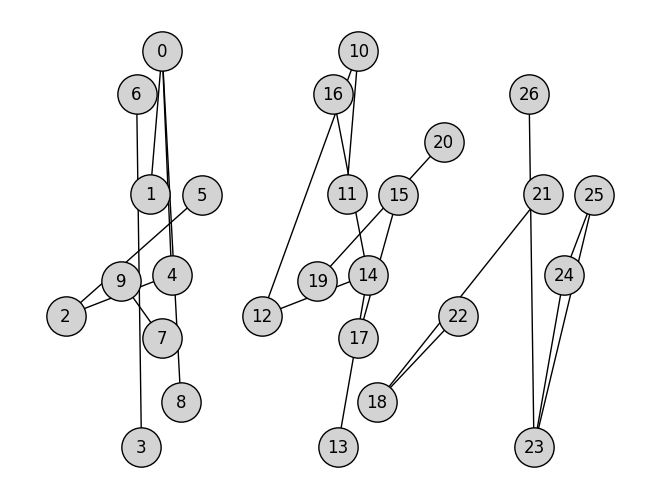

In [123]:
path = '/home/ad/mgao/BotDGT/New/SLATE/notebooks/'
if os.path.exists(path+"f_pickle/toy_dataset_layout.pkl"):
    with open(path+"f_pickle/toy_dataset_layout.pkl", "rb") as f:
        new_fixed_layout = pickle.load(f)


# print(new_fixed_layout)
new_fixed_layout[20] = np.array([3.51951977, 0.18478261])

nx.draw(
    sup_G,
    pos=new_fixed_layout,
    with_labels=True,
    node_size=800,
    edgecolors="black",
    node_color="lightgrey",
)

In [9]:
len(G1.nodes),len(G2.nodes),len(G3.nodes)

(229580, 229580, 229580)

In [11]:
import scipy.sparse as sp

def create_sparse_adj_matrix(G):
    n = len(G.nodes)
    adj_matrix = sp.lil_matrix((n, n), dtype=int)  # 使用稀疏矩阵
    for u, v in G.edges():
        adj_matrix[u, v] = 1
        adj_matrix[v, u] = 1  # 如果是无向图，需要对称
    return adj_matrix

# 创建稀疏邻接矩阵
adj_matrix_1 = create_sparse_adj_matrix(G1)
adj_matrix_2 = create_sparse_adj_matrix(G2)
adj_matrix_3 = create_sparse_adj_matrix(G3)

In [11]:
# adj_matrix_1 = torch.zeros((20, 20))
# adj_matrix_2 = torch.zeros((20, 20))
# adj_matrix_3 = torch.zeros((20, 20))

# adj_matrix_1 = torch.zeros((len(G1.nodes), len(G1.nodes)))
# adj_matrix_2 = torch.zeros((len(G1.nodes), len(G1.nodes)))
# adj_matrix_3 = torch.zeros((len(G1.nodes), len(G1.nodes)))

# for e in G1.edges:
#     u, v = e
#     adj_matrix_1[u, v] = 1
#     adj_matrix_1[v, u] = 1

# for e in G2.edges:
#     u, v = e
#     adj_matrix_2[u, v] = 1
#     adj_matrix_2[v, u] = 1

# for e in G3.edges:
#     u, v = e
#     adj_matrix_3[u, v] = 1
#     adj_matrix_3[v, u] = 1

RuntimeError: [enforce fail at alloc_cpu.cpp:117] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 210827905600 bytes. Error code 12 (Cannot allocate memory)

In [12]:
adj_matrix_1.shape, adj_matrix_2.shape,adj_matrix_3.shape

((229580, 229580), (229580, 229580), (229580, 229580))

In [13]:
sub_G[0]

Data(edge_index=[2, 1249], edge_type=[1249], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580])

In [14]:
sub_G[1]

Data(edge_index=[2, 14946], edge_type=[14946], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580])

In [15]:
from scipy.sparse import diags

def create_sparse_ones_diagonal_matrix(n):
    # 创建一个长度为n的全1数组
    ones_diagonal = np.ones(n, dtype=int)
    
    # 使用diags函数创建稀疏对角矩阵
    ones_diagonal_matrix = diags(ones_diagonal, format='lil')
    
    # 将稀疏矩阵转换为COO格式
    coo_matrix = ones_diagonal_matrix.tocoo()
    
    # 将COO格式的稀疏矩阵转换为PyTorch稀疏张量
    indices = torch.tensor(np.vstack((coo_matrix.row, coo_matrix.col)), dtype=torch.long)
    values = torch.tensor(coo_matrix.data, dtype=torch.float)
    size = torch.Size(coo_matrix.shape)
    
    sparse_tensor = torch.sparse_coo_tensor(indices, values, size)
    
    return sparse_tensor

In [16]:
sub_G[1].edge_index.shape

torch.Size([2, 14946])

In [17]:
import torch
from torch_geometric.utils import to_undirected
from slate.datasets import Discrete_graph

# Convert networkx into pytorch geometric data used in SLATE
T = 3
N1, N2, N3 = len(G1.nodes),len(G2.nodes),len(G3.nodes)
edge_index1 = sub_G[1].edge_index.contiguous()
edge_index2 = sub_G[2].edge_index.contiguous()
edge_index3 = sub_G[3].edge_index.contiguous()
# edge_index1 = adj_matrix_1.nonzero().t().contiguous()
# edge_index2 = adj_matrix_2.nonzero().t().contiguous()
# edge_index3 = adj_matrix_3.nonzero().t().contiguous()
# x1 = torch.eye(N1 + 1)
# x2 = torch.eye(N2 + 1)
# x3 = torch.eye(N3 + 1)
x1 = create_sparse_ones_diagonal_matrix(N1)
x2 = create_sparse_ones_diagonal_matrix(N2)
x3 = create_sparse_ones_diagonal_matrix(N3)
time1 = torch.zeros(len(edge_index1[0]))
time2 = torch.ones(len(edge_index2[0]))
time3 = 2 * torch.ones(len(edge_index3[0]))
weights1 = torch.ones(len(edge_index1[0]))
weights2 = torch.ones(len(edge_index2[0]))
weights3 = torch.ones(len(edge_index3[0]))

dg1 = Discrete_graph(edge_index1, weights1, time1, x1, None)
dg2 = Discrete_graph(edge_index2, weights2, time2, x2, None)
dg3 = Discrete_graph(edge_index3, weights3, time3, x3, None)
graphs = [dg1, dg2, dg3]

In [18]:
edge_index3.shape, time3.shape

(torch.Size([2, 45331]), torch.Size([45331]))

In [19]:
edge_index2.shape,time2.shape

(torch.Size([2, 27264]), torch.Size([27264]))

In [20]:
edge_index1.shape,time1.shape

(torch.Size([2, 14946]), torch.Size([14946]))

In [21]:
# SLATE SETTINGS
add_time_connection = (
    True  # Add temporal connection between identical nodes in different snapshots
)
remove_isolated = True  # Remove isolated nodes in the supra graph
add_vn = True  # Add a virtual node connected to all nodes in the snapshot
num_nodes = [N1, N2, N3]
# Function to convert a list of DiscreteGraph objects into a connected supra graph
# Same function used in dgt.lib.supra


num_graphs = len(graphs)
edge_index = []
edge_weight = []
l_id_vn = []
# Supra graph creation

for i in range(num_graphs):
    ei = (
        graphs[i].edge_index + i * num_nodes[i]
    )  # IMPORTANT: We considere nodes in different snapshots as different nodes
    ew = graphs[i].edge_weight

    if add_vn:
        # id_vn = num_nodes[i] * num_graphs + i  # Assign an id to the virtual node
        id_vn = sum(num_nodes) + i
        l_id_vn.append(id_vn)  # Necessary to identify the virtual node
        nodes_snapshot = torch.unique(
            ei.view(-1)
        )  # Get the connected nodes in the snapshot
        # Add connections between the virtual node and the nodes (deg > 0) in the snapshot
        # We do not connect the virtual node to isolated nodes
        vn_connections = torch.cat(
            (
                torch.tensor([id_vn] * len(nodes_snapshot)).view(1, -1),
                nodes_snapshot.view(1, -1),
            ),
            dim=0,
        )
        ei = torch.cat((ei, vn_connections), dim=1)
        ew = torch.cat((ew, torch.ones(len(nodes_snapshot))))

        print('ei:',ei)
        print('ew:',ew)
        print('='*100)

    if add_time_connection:
        # Add temporal connections between identical nodes in different snapshots
        if i < num_graphs - 1:
            ei_i = graphs[i].edge_index
            ei_next = graphs[i + 1].edge_index
            print('ei_i:',ei_i)
            print('ei_netxt:',ei_next)
            
            nodes_snapshot = torch.unique(ei_i.view(-1))
            nodes_snapshot_next = torch.unique(ei_next.view(-1))

            print('nodes_snapshot',nodes_snapshot)
            print('nodes_snapshot_next',nodes_snapshot_next)
            # Intersection
            common_nodes = torch.LongTensor(
                np.intersect1d(nodes_snapshot, nodes_snapshot_next)
            )
            # Add temporal connections

            
            # src = common_nodes + i * num_nodes[i]
            # dst = common_nodes + i * num_nodes[i]
            if i < 1:
                src = common_nodes + i * num_nodes[i]
                dst = common_nodes + num_nodes[i]
            else:
                src = common_nodes + i * num_nodes[i-1]
                dst = common_nodes + sum(num_nodes[:i+1])
            time_co = torch.vstack((src, dst))
            ei = torch.cat((ei, time_co), dim=1)
            ew = torch.cat((ew, torch.ones(len(common_nodes))))

            print('*'*100)
            print('common_nodes:',common_nodes,'time_co:',time_co)

            # print('ei:',ei)
            # print('ew:',ew)
            # print('='*100)

    edge_index.append(ei)
    edge_weight.append(ew)
edge_index = torch.cat(edge_index, dim=1)
edge_weight = torch.cat(edge_weight)

print(edge_index.shape)

# Now we have to create a mask to remove the isolated nodes
total_nodes = sum(num_nodes) + num_graphs if add_vn else sum(num_nodes)

print(total_nodes)

mask = torch.zeros(total_nodes)
mask[torch.unique(edge_index)] = 1
# Indices of isolated nodes
isolated_nodes = torch.where(mask == 0)[0]
print("Isolated Nodes", isolated_nodes)
print("Virtual nodes", l_id_vn)

# Make the graph undirected
edge_index, edge_weight = to_undirected(edge_index, edge_weight)
edge_weight = torch.ones(edge_index.size(1))
# We return the edge_index, edge_weight, and the mask list of isolated nodes


ei: tensor([[     2,      2,      2,  ..., 688740, 688740, 688740],
        [ 16332,     56,  14713,  ..., 229543, 229561, 229577]])
ew: tensor([1., 1., 1.,  ..., 1., 1., 1.])
ei_i: tensor([[     2,      2,      2,  ..., 225070, 225070, 225070],
        [ 16332,     56,  14713,  ...,  27347, 229165, 227580]])
ei_netxt: tensor([[     2,      2,      2,  ..., 225191, 225191, 225191],
        [ 16332,     56,  14713,  ..., 224783, 228881, 229300]])
nodes_snapshot tensor([     0,      2,      3,  ..., 229543, 229561, 229577])
nodes_snapshot_next tensor([     0,      2,      3,  ..., 229561, 229567, 229577])
****************************************************************************************************
common_nodes: tensor([     0,      2,      3,  ..., 229543, 229561, 229577]) time_co: tensor([[     0,      2,      3,  ..., 229543, 229561, 229577],
        [229580, 229582, 229583,  ..., 459123, 459141, 459157]])
ei: tensor([[229582, 229582, 229582,  ..., 688741, 688741, 688741],
     

In [22]:
sum(num_nodes)

688740

In [23]:
torch.unique(edge_index)

tensor([     0,      2,      3,  ..., 688740, 688741, 688742])

In [24]:
print(total_nodes)

688743


In [25]:
import numpy as np
from scipy.sparse import lil_matrix

def create_sparse_adj_matrix(total_nodes, edge_index):
    # 创建一个稀疏矩阵
    adj_matrix = lil_matrix((total_nodes, total_nodes), dtype=int)
    
    # 遍历边索引并填充稀疏矩阵
    for i in range(edge_index.shape[1]):
        u, v = edge_index[:, i]
        adj_matrix[u, v] = 1
        adj_matrix[v, u] = 1  # 如果是无向图，需要对称
    
    return adj_matrix



sup_G_adj = create_sparse_adj_matrix(total_nodes, edge_index)

# # 将稀疏矩阵转换为密集矩阵以便查看
# dense_matrix = sup_G_adj.toarray()

# print(dense_matrix)
sup_G_adj.shape

(688743, 688743)

In [143]:

# sup_G_adj = np.zeros((total_nodes, total_nodes))
# for i in range(edge_index.shape[1]):
#     u, v = edge_index[:, i]
#     sup_G_adj[u, v] = 1
#     sup_G_adj[v, u] = 1



30


In [36]:
transform_sup_G = nx.from_numpy_array(sup_G_adj)
# layout_transform_sup_G = new_fixed_layout.copy()

In [145]:
layout_transform_sup_G[30] = np.array([-0.8, 0.11])
layout_transform_sup_G[31] = np.array([1.60, 0.11])
layout_transform_sup_G[32] = np.array([3.90, 0.11])


In [26]:
transform_sup_G.remove_nodes_from(list(isolated_nodes))

NameError: name 'transform_sup_G' is not defined

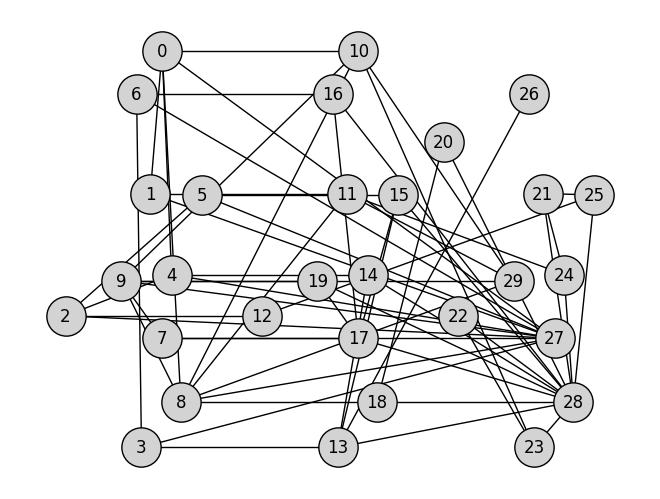

In [147]:
nx.draw(
    transform_sup_G,
    pos=layout_transform_sup_G,
    with_labels=True,
    node_size=800,
    edgecolors="black",
    node_color="lightgrey",
)

In [31]:
from slate.lib import reindex_edge_index, AddSupraLaplacianPE
import torch.nn as nn
from scipy.sparse.linalg import eigsh

# SLATE EXAMPLE SETTINGS
k = 12
dim_embedding = 4
normalization = "sym"

supralaplacianPE = AddSupraLaplacianPE(
    k=k, normalization=normalization, is_undirected=True, add_eig_vals=False,
    which="SA",
)
embed_nodes = nn.Embedding(sum(num_nodes), embedding_dim=dim_embedding)

In [32]:
embed_nodes

Embedding(688740, 4)

In [33]:
# from slate.lib import reindex_edge_index, AddSupraLaplacianPE
import torch.nn as nn

new_edge_index = reindex_edge_index(
    edge_index
)  # Reindex the edge index to remove isolated nodes, Necessary to compute eigenvalues
num_nodes_supra = len(torch.unique(new_edge_index[0]))
len(torch.unique(new_edge_index)) == total_nodes - len(isolated_nodes)
k = 12
print('num_nodes_supra:',num_nodes_supra)

pe = supralaplacianPE(
    edge_index=new_edge_index, 
    edge_weight=edge_weight, 
    num_nodes=num_nodes_supra, 
)
# Add the positional encoding to the isolated nodes (0)
all_pe = torch.zeros((total_nodes, k))
all_pe[mask == 1] = pe

num_nodes_supra: 86074


In [35]:
node_embedding1 = embed_nodes(torch.arange(N1+1))
node_embedding2 = embed_nodes(torch.arange(N2+1))
node_embedding3 = embed_nodes(torch.arange(N3+1))

# print(node_embedding1,node_embedding1.shape)
# print(node_embedding1[:-1, :].shape)


# We consider same node in different snapshots as different nodes
tokens1 = node_embedding1[:-1, :]
tokens2 = node_embedding2[:-1, :]
tokens3 = node_embedding3[:-1, :]
print('tokens1.shape:',tokens1.shape)
print('tokens2.shape:',tokens2.shape)
print('tokens3.shape:',tokens3.shape)

tokens = torch.cat([tokens1, tokens2, tokens3], dim=0)
print('tokens.shape:',tokens.shape)

print(node_embedding1)
print('node_embedding1[-1]:',node_embedding1[-1])

vn_emb = torch.cat([torch.tensor(node_embedding1[-1]).unsqueeze(0), torch.tensor(node_embedding2[-1]).unsqueeze(0), torch.tensor(node_embedding3[-1]).unsqueeze(0)], dim=0)

print(vn_emb.shape)
# cat the tokens of the nodes and the num_graphs virtual nodes
tokens = torch.cat(
    (tokens, vn_emb), dim=0
)  # Add the virtual nodes at the end of the tokens

tokens.shape

tokens1.shape: torch.Size([229580, 4])
tokens2.shape: torch.Size([229580, 4])
tokens3.shape: torch.Size([229580, 4])
tokens.shape: torch.Size([688740, 4])
tensor([[ 1.0507,  1.3846, -0.0496, -0.8181],
        [ 0.6449, -0.4130, -1.1943, -0.0029],
        [-0.6138,  1.8671,  0.6446, -0.3900],
        ...,
        [ 0.0148,  0.0438, -0.5971,  2.0442],
        [-0.9589, -0.0794, -0.6772, -0.8957],
        [-0.3793, -0.5920, -0.6929, -2.6479]], grad_fn=<EmbeddingBackward0>)
node_embedding1[-1]: tensor([-0.3793, -0.5920, -0.6929, -2.6479], grad_fn=<SelectBackward0>)
torch.Size([3, 4])


/tmp/ipykernel_3198136/1358907301.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vn_emb = torch.cat([torch.tensor(node_embedding1[-1]).unsqueeze(0), torch.tensor(node_embedding2[-1]).unsqueeze(0), torch.tensor(node_embedding3[-1]).unsqueeze(0)], dim=0)


torch.Size([688743, 4])

In [36]:
# Add the positional encoding to the tokens
tokens = torch.cat((tokens, all_pe), dim=1)
tokens.shape

torch.Size([688743, 16])

In [37]:
lin_transform = nn.Linear(dim_embedding + k, dim_embedding)
tokens = lin_transform(tokens)


norm = nn.LayerNorm(dim_embedding)
encoder_layer = nn.TransformerEncoderLayer(
    d_model=dim_embedding,
    nhead=2,
    dim_feedforward=24,
    batch_first=True,
    norm_first=True,
)

spatio_temp_attn = nn.TransformerEncoder(encoder_layer, num_layers=1, norm=norm)

/home/ad/miniconda/envs/SLATE/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [43]:
spatio_temp_attn

TransformerEncoder(
  (layers): ModuleList(
    (0): TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=4, out_features=4, bias=True)
      )
      (linear1): Linear(in_features=4, out_features=24, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=24, out_features=4, bias=True)
      (norm1): LayerNorm((4,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((4,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (norm): LayerNorm((4,), eps=1e-05, elementwise_affine=True)
)

In [50]:
from scipy.sparse import csr_matrix,vstack


def process_tokens_in_chunks_sparse(tokens, chunk_size, spatio_temp_attn, T):
    final_embs = []
    for i in range(0, tokens.size(0), chunk_size):
        chunk = tokens[i:i + chunk_size]
        embed_token = spatio_temp_attn(chunk.unsqueeze(0)).squeeze()
        # print('embed_token:',embed_token.shape)
        final_emb = embed_token
        # final_emb = embed_token[:-T,:]
        
        # 将final_emb转换为稀疏矩阵
        sparse_final_emb = csr_matrix(final_emb.detach().numpy())
        final_embs.append(sparse_final_emb)
    
    # 合并稀疏矩阵
    combined_sparse_emb = csr_matrix(vstack(final_embs))
    return combined_sparse_emb[:-T,:]

In [51]:
chunk_size = 100

final_emb_sparse = process_tokens_in_chunks_sparse(tokens,chunk_size,spatio_temp_attn,T)
final_emb_sparse.shape

(688740, 4)

In [52]:
num_nodes

[229580, 229580, 229580]

In [118]:
import torch
from scipy.sparse import csr_matrix

def reshape_sparse_matrix(csr_matrix_example, N, T, dim_embedding):
    """
    Reshape a CSR matrix of shape (N*3, 4) into a sparse tensor with shape (N, 3, 4).
    
    Parameters:
    csr_matrix_example (csr_matrix): Input sparse CSR matrix of shape (N*3, 4).
    N (int): The number of nodes (the new first dimension of the tensor).
    T (int): The second dimension (3 rows for each node).
    dim_embedding (int): The third dimension (4 features for each node).
    
    Returns:
    torch.Tensor: A sparse tensor of shape (N, 3, 4).
    """
    # Ensure the input matrix has the correct shape (N*3, 4)
    assert csr_matrix_example.shape[0] == N * T and csr_matrix_example.shape[1] == dim_embedding, \
        f"Expected shape ({N*T}, {dim_embedding}), but got {csr_matrix_example.shape}"

    # Get the row, column, and data from the CSR matrix
    rows = csr_matrix_example.indices  # Row indices of non-zero values
    cols = csr_matrix_example.indptr[:-1]  # Column indices (indptr gives the starting position)
    data = csr_matrix_example.data  # Non-zero values

    # Row mapping: We are reshaping N*3 rows into N blocks, each with T rows
    row_mapping = rows // T  # Group rows into N groups (N is the number of nodes)

    # Column mapping: No need to change column mapping as we have the same number of features (dim_embedding)
    col_mapping = cols  # Column mapping is the same as the original matrix

    # Check for shape mismatch
    if row_mapping.shape[0] != len(data):
        raise ValueError(f"Mismatch between row mapping length and data length: {row_mapping.shape[0]} vs {len(data)}")

    # Generate new indices for reshaping: The row_mapping and column_mapping determine the new sparse indices
    reshaped_indices = torch.stack([torch.tensor(row_mapping, dtype=torch.long),
                                    torch.tensor(cols[:-1], dtype=torch.long)], dim=0)
    
    # Create a sparse tensor from the reshaped indices and original data
    new_shape = (N, T, dim_embedding)
    reshaped_sparse_tensor = torch.sparse_coo_tensor(reshaped_indices, torch.tensor(data, dtype=torch.float32),
                                                     size=new_shape)

    return reshaped_sparse_tensor


In [119]:
final_emb_sparse.shape

(688740, 4)

In [138]:
import numpy as np
import torch
from scipy.sparse import csr_matrix

def reshape_sparse_matrix(csr_matrix_example, new_shape):
    """
    将稀疏矩阵从 (688740, 4) 重塑为 (229580, 3, 4) 的稀疏矩阵。
    
    参数:
    csr_matrix_example (csr_matrix): 输入的稀疏矩阵
    new_shape (tuple): 目标形状，应该为 (229580, 3, 4)

    返回:
    torch.sparse.Tensor: 重塑后的稀疏张量
    """
    # 获取稀疏矩阵的行和列索引及其数据
    rows, cols = csr_matrix_example.nonzero()
    data = csr_matrix_example.data
    
    # 确定新的形状
    N, T, dim_embedding = new_shape  # N = 229580, T = 3, dim_embedding = 4
    
    # 创建新的行映射
    new_rows = (rows // T).astype(int)  # 将原行索引映射到新行索引

    # 创建新的稀疏张量索引
    reshaped_indices = torch.stack([
        torch.tensor(new_rows, dtype=torch.long),  # 新的行索引
        torch.tensor(cols, dtype=torch.long)       # 保持列索引不变
    ], dim=0)

    # 创建新的稀疏张量（二维）
    reshaped_sparse_tensor = torch.sparse_coo_tensor(
        indices=reshaped_indices,
        values=torch.tensor(data, dtype=torch.float32),
        size=(N, dim_embedding)  # 这里是二维
    )

    return reshaped_sparse_tensor



# 重塑稀疏矩阵
reshaped_sparse_tensor = reshape_sparse_matrix(final_emb_sparse, (229580, 3, 4))
print(reshaped_sparse_tensor)


RuntimeError: number of dimensions must be sparse_dim (2) + dense_dim (0), but got 3

In [137]:
reshaped_sparse_tensor.shape

torch.Size([229580, 4])

In [99]:
type(final_emb_sparse)

scipy.sparse._csr.csr_matrix

In [94]:
final_emb = reshape_sparse_matrix(final_emb_sparse, num_nodes[0], T, dim_embedding)
final_emb.shape

RuntimeError: stack expects each tensor to be equal size, but got [2754960] at entry 0 and [688741] at entry 1

In [58]:
final_emb = final_emb.view(sum(num_nodes), T, dim_embedding)

final_emb.shape

AttributeError: 'csr_matrix' object has no attribute 'view'

In [50]:
embed_token = spatio_temp_attn(
    tokens.unsqueeze(0)
).squeeze()  # dim = [1,T*(N+1),d] ;  N+1 because we add the virtual node
# We remove the virtual nodes, because we don't need them for prediction
final_emb = embed_token[:-T]

print(final_emb.shape)

final_emb = final_emb.view(sum(num_nodes), T, dim_embedding)

final_emb.shape

RuntimeError: [enforce fail at alloc_cpu.cpp:117] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 3794935360392 bytes. Error code 12 (Cannot allocate memory)

In [140]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

def plot_supragraph_laplacian(transform_sup_G, vec_propre, layout_transform_sup_G):
    cmap = LinearSegmentedColormap.from_list(
        "custom_cmap", ["purple", "white", "green"], N=256
    )
    fig, ax = plt.subplots(figsize=(8, 8))  # Create a figure and an axes
    nx.draw(
        transform_sup_G,
        pos=layout_transform_sup_G,
        node_color=vec_propre,
        cmap=cmap,
        vmin=-1,
        vmax=1,
        edgecolors="black",
        with_labels=True,
        ax=ax,
        node_size=800,
    )

    # Create a ScalarMappable object
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
    sm.set_array([])
    # Add the colorbar to the figure
    fig.colorbar(sm, ax=ax, orientation="vertical")  # Use the axes for the colorbar

In [141]:
sup_lap = nx.laplacian_matrix(sup_G).toarray().astype(np.float32)
eig_vals, eig_vecs = eigsh(
    sup_lap,
    k=69,
    which="SA",
    return_eigenvectors=True,
)

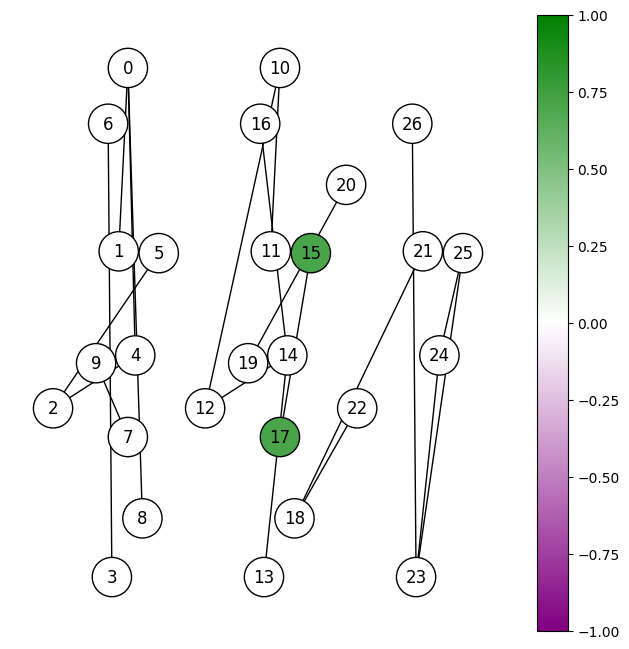

In [142]:
plot_supragraph_laplacian(sup_G, eig_vecs[:, 7], new_fixed_layout)

In [138]:
embed_nodes

Embedding(11, 4)

In [139]:
node_embedding = embed_nodes(torch.arange(N1+1))
print(node_embedding,node_embedding.shape)
print(node_embedding[:-1, :].shape)
# tokens = torch.concat([],dim=0)

tokens = node_embedding[:-1, :].repeat(
    T, 1
)  # We consider same node in different snapshots as different nodes
print('tokens.shape:',tokens.shape)
vn_emb = node_embedding[-1].repeat(T, 1)
# cat the tokens of the nodes and the num_graphs virtual nodes
tokens = torch.cat(
    (tokens, vn_emb), dim=0
)  # Add the virtual nodes at the end of the tokens

tokens.shape

tensor([[-2.8521, -3.1006, -0.9208,  0.1165],
        [ 0.3264, -1.0064, -0.7992,  1.5853],
        [ 0.4747, -0.1130,  0.8327,  0.0511],
        [-0.4387, -0.0971,  0.5172, -0.1833],
        [ 0.0805, -0.4460, -1.4635,  0.8469],
        [-0.3432,  0.5831, -0.2559,  1.0079],
        [-0.2780,  0.5307,  0.2171, -1.8879],
        [-0.8377,  0.4668,  1.0725,  1.3164],
        [-0.8603,  0.9802,  0.5691, -1.0083],
        [ 2.6735,  0.2315, -1.2136,  1.4397],
        [-0.4848,  0.2523,  0.7281, -1.3454]], grad_fn=<EmbeddingBackward0>) torch.Size([11, 4])
torch.Size([10, 4])
tokens.shape: torch.Size([30, 4])


torch.Size([33, 4])

In [19]:
graphs[0].num_nodes = len(G1.nodes)
graphs[1].num_nodes = len(G2.nodes)
graphs[2].num_nodes = len(G3.nodes)
graphs[0].num_nodes,graphs[1].num_nodes,graphs[2].num_nodes

(6, 7, 7)

In [20]:
import numpy as np

# SLATE SETTINGS
add_time_connection = (
    True  # Add temporal connection between identical nodes in different snapshots
)
remove_isolated = True  # Remove isolated nodes in the supra graph
add_vn = True  # Add a virtual node connected to all nodes in the snapshot
num_nodes = 6  # This is the initial number of nodes in the first snapshot
# Function to convert a list of DiscreteGraph objects into a connected supra graph
# Same function used in dgt.lib.supra

num_graphs = len(graphs)
edge_index = []
edge_weight = []
l_id_vn = []
# Supra graph creation

# Initialize an offset variable for node IDs
current_offset = 0

for i in range(num_graphs):
    # Get the current graph's edge_index and edge_weight
    ei = graphs[i].edge_index + current_offset  # Adjust for current offset
    ew = graphs[i].edge_weight

    # Number of nodes in the current snapshot
    current_num_nodes = graphs[i].num_nodes

    if add_vn:
        # Assign an ID to the virtual node
        id_vn = current_offset + current_num_nodes  # Virtual node ID for this snapshot
        l_id_vn.append(id_vn)  # Keep track of virtual node IDs
        nodes_snapshot = torch.unique(ei.view(-1))  # Get the connected nodes in the snapshot

        # Add connections between the virtual node and the nodes (deg > 0) in the snapshot
        # We do not connect the virtual node to isolated nodes
        vn_connections = torch.cat(
            (
                torch.tensor([id_vn] * len(nodes_snapshot)).view(1, -1),
                nodes_snapshot.view(1, -1),
            ),
            dim=0,
        )
        ei = torch.cat((ei, vn_connections), dim=1)
        ew = torch.cat((ew, torch.ones(len(nodes_snapshot))))

    if add_time_connection:
        # Add temporal connections between identical nodes in different snapshots
        if i < num_graphs - 1:
            ei_i = graphs[i].edge_index
            ei_next = graphs[i + 1].edge_index
            nodes_snapshot = torch.unique(ei_i.view(-1))
            nodes_snapshot_next = torch.unique(ei_next.view(-1))

            # Intersection
            common_nodes = torch.LongTensor(
                np.intersect1d(nodes_snapshot, nodes_snapshot_next)
            )
            # Add temporal connections
            src = common_nodes + current_offset  # Temporal connection from current snapshot
            dst = common_nodes + current_offset + current_num_nodes  # Temporal connection to next snapshot
            time_co = torch.vstack((src, dst))
            ei = torch.cat((ei, time_co), dim=1)
            ew = torch.cat((ew, torch.ones(len(common_nodes))))

    # Add the edges from this snapshot to the overall edge list
    edge_index.append(ei)
    edge_weight.append(ew)

    # Update the offset for the next snapshot (current offset + number of nodes in this snapshot + 1 for virtual node if added)
    current_offset += current_num_nodes + (1 if add_vn else 0)

# Concatenate all edge indices and weights for the final supra graph
edge_index = torch.cat(edge_index, dim=1)
edge_weight = torch.cat(edge_weight)

print("Edge Index:", edge_index)
print("Edge Index Shape:", edge_index.shape)

# Now we have to create a mask to remove the isolated nodes
total_nodes = current_offset  # Total nodes will be the current_offset after the last snapshot

print("Total Nodes:", total_nodes)

mask = torch.zeros(total_nodes)
mask[torch.unique(edge_index)] = 1
# Indices of isolated nodes
isolated_nodes = torch.where(mask == 0)[0]
print("Isolated Nodes:", isolated_nodes)
print("Virtual Nodes:", l_id_vn)

# Make the graph undirected
edge_index, edge_weight = to_undirected(edge_index, edge_weight)
edge_weight = torch.ones(edge_index.size(1))
# We return the edge_index, edge_weight, and the mask list of isolated nodes


Edge Index: tensor([[ 0,  0,  1,  1,  2,  2,  2,  3,  4,  5,  6,  6,  6,  6,  6,  6,  0,  1,
          2,  3,  4,  5,  7,  7,  8,  9,  9,  9, 10, 11, 12, 13, 14, 14, 14, 14,
         14, 14, 14,  7,  8,  9, 10, 11, 12, 13, 15, 15, 16, 17, 17, 17, 18, 19,
         20, 21, 22, 22, 22, 22, 22, 22, 22],
        [ 1,  2,  0,  2,  0,  1,  3,  2,  5,  4,  0,  1,  2,  3,  4,  5,  6,  7,
          8,  9, 10, 11,  8,  9,  7,  7, 10, 13,  9, 12, 11,  9,  7,  8,  9, 10,
         11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 19, 20, 17, 16, 18, 21, 17, 15,
         15, 17, 15, 16, 17, 18, 19, 20, 21]])
Edge Index Shape: torch.Size([2, 63])
Total Nodes: 23
Isolated Nodes: tensor([], dtype=torch.int64)
Virtual Nodes: [6, 14, 22]


In [ ]:
# SLATE SETTINGS
add_time_connection = (
    True  # Add temporal connection between identical nodes in different snapshots
)
remove_isolated = True  # Remove isolated nodes in the supra graph
add_vn = True  # Add a virtual node connected to all nodes in the snapshot
num_nodes = 10
# Function to convert a list of DiscreteGraph objects into a connected supra graph
# Same function used in dgt.lib.supra


num_graphs = len(graphs)
edge_index = []
edge_weight = []
l_id_vn = []
# Supra graph creation

for i in range(num_graphs):
    ei = (
        graphs[i].edge_index + i * num_nodes
    )  # IMPORTANT: We considere nodes in different snapshots as different nodes
    ew = graphs[i].edge_weight

    if add_vn:
        id_vn = num_nodes * num_graphs + i  # Assign an id to the virtual node
        l_id_vn.append(id_vn)  # Necessary to identify the virtual node
        nodes_snapshot = torch.unique(
            ei.view(-1)
        )  # Get the connected nodes in the snapshot
        # Add connections between the virtual node and the nodes (deg > 0) in the snapshot
        # We do not connect the virtual node to isolated nodes
        vn_connections = torch.cat(
            (
                torch.tensor([id_vn] * len(nodes_snapshot)).view(1, -1),
                nodes_snapshot.view(1, -1),
            ),
            dim=0,
        )
        ei = torch.cat((ei, vn_connections), dim=1)
        ew = torch.cat((ew, torch.ones(len(nodes_snapshot))))

    if add_time_connection:
        # Add temporal connections between identical nodes in different snapshots
        if i < num_graphs - 1:
            ei_i = graphs[i].edge_index
            ei_next = graphs[i + 1].edge_index
            nodes_snapshot = torch.unique(ei_i.view(-1))
            nodes_snapshot_next = torch.unique(ei_next.view(-1))

            print('nodes_snapshot',nodes_snapshot)
            print('nodes_snapshot_next',nodes_snapshot_next)
            # Intersection
            common_nodes = torch.LongTensor(
                np.intersect1d(nodes_snapshot, nodes_snapshot_next)
            )
            # Add temporal connections
            src = common_nodes + i * num_nodes
            dst = common_nodes + (i + 1) * num_nodes
            time_co = torch.vstack((src, dst))
            ei = torch.cat((ei, time_co), dim=1)
            ew = torch.cat((ew, torch.ones(len(common_nodes))))

    edge_index.append(ei)
    edge_weight.append(ew)
edge_index = torch.cat(edge_index, dim=1)
edge_weight = torch.cat(edge_weight)

print(edge_index,edge_index.shape)

# Now we have to create a mask to remove the isolated nodes
total_nodes = num_nodes * num_graphs + num_graphs if add_vn else num_nodes * num_graphs

print(total_nodes)

mask = torch.zeros(total_nodes)
mask[torch.unique(edge_index)] = 1
# Indices of isolated nodes
isolated_nodes = torch.where(mask == 0)[0]
print("Isolated Nodes", isolated_nodes)
print("Virtual nodes", l_id_vn)

# Make the graph undirected
edge_index, edge_weight = to_undirected(edge_index, edge_weight)
edge_weight = torch.ones(edge_index.size(1))
# We return the edge_index, edge_weight, and the mask list of isolated nodes


nodes_snapshot tensor([0, 1, 2, 3, 4, 5, 6, 8, 9])
nodes_snapshot_next tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
nodes_snapshot tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
nodes_snapshot_next tensor([0, 1, 2, 4, 5, 7, 8, 9])
tensor([[ 0,  0,  0,  1,  1,  2,  2,  2,  3,  4,  5,  5,  6,  6,  8,  9,  9,  9,
         30, 30, 30, 30, 30, 30, 30, 30, 30,  0,  1,  2,  3,  4,  5,  6,  8,  9,
         10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13,
         14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19,
         31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 10, 11, 12, 14, 15, 17, 18, 19,
         20, 20, 21, 22, 24, 24, 25, 25, 27, 27, 28, 28, 28, 29, 32, 32, 32, 32,
         32, 32, 32, 32],
        [ 1,  5,  8,  0,  6,  3,  4,  9,  2,  2,  0,  9,  1,  9,  0,  2,  5,  6,
          0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19,
         11, 14, 15, 16, 18, 19, 10, 12, 13, 17, 18, 19, 11, 13, 15, 11, 12, 15,
         10, 18, 10, 12, 13,

In [25]:
# SLATE SETTINGS
add_time_connection = (
    True  # Add temporal connection between identical nodes in different snapshots
)
remove_isolated = True  # Remove isolated nodes in the supra graph
add_vn = True  # Add a virtual node connected to all nodes in the snapshot
num_nodes = 6
# Function to convert a list of DiscreteGraph objects into a connected supra graph
# Same function used in dgt.lib.supra


num_graphs = len(graphs)
edge_index = []
edge_weight = []
l_id_vn = []
# Supra graph creation

for i in range(num_graphs):
    ei = (
        graphs[i].edge_index + i * num_nodes
    )  # IMPORTANT: We considere nodes in different snapshots as different nodes
    ew = graphs[i].edge_weight

    if add_vn:
        id_vn = num_nodes * num_graphs + i  # Assign an id to the virtual node
        l_id_vn.append(id_vn)  # Necessary to identify the virtual node
        nodes_snapshot = torch.unique(
            ei.view(-1)
        )  # Get the connected nodes in the snapshot
        # Add connections between the virtual node and the nodes (deg > 0) in the snapshot
        # We do not connect the virtual node to isolated nodes
        vn_connections = torch.cat(
            (
                torch.tensor([id_vn] * len(nodes_snapshot)).view(1, -1),
                nodes_snapshot.view(1, -1),
            ),
            dim=0,
        )
        ei = torch.cat((ei, vn_connections), dim=1)
        ew = torch.cat((ew, torch.ones(len(nodes_snapshot))))

    if add_time_connection:
        # Add temporal connections between identical nodes in different snapshots
        if i < num_graphs - 1:
            ei_i = graphs[i].edge_index
            ei_next = graphs[i + 1].edge_index
            nodes_snapshot = torch.unique(ei_i.view(-1))
            nodes_snapshot_next = torch.unique(ei_next.view(-1))

            print('nodes_snapshot',nodes_snapshot)
            print('nodes_snapshot_next',nodes_snapshot_next)
            # Intersection
            common_nodes = torch.LongTensor(
                np.intersect1d(nodes_snapshot, nodes_snapshot_next)
            )
            # Add temporal connections
            src = common_nodes + i * num_nodes
            dst = common_nodes + (i + 1) * num_nodes
            time_co = torch.vstack((src, dst))
            ei = torch.cat((ei, time_co), dim=1)
            ew = torch.cat((ew, torch.ones(len(common_nodes))))

    edge_index.append(ei)
    edge_weight.append(ew)
edge_index = torch.cat(edge_index, dim=1)
edge_weight = torch.cat(edge_weight)

print(edge_index,edge_index.shape)

# Now we have to create a mask to remove the isolated nodes
total_nodes = num_nodes * num_graphs + num_graphs if add_vn else num_nodes * num_graphs

print(total_nodes)

mask = torch.zeros(total_nodes)
mask[torch.unique(edge_index)] = 1
# Indices of isolated nodes
isolated_nodes = torch.where(mask == 0)[0]
print("Isolated Nodes", isolated_nodes)
print("Virtual nodes", l_id_vn)

# Make the graph undirected
edge_index, edge_weight = to_undirected(edge_index, edge_weight)
edge_weight = torch.ones(edge_index.size(1))
# We return the edge_index, edge_weight, and the mask list of isolated nodes


nodes_snapshot tensor([0, 1, 2, 3, 4, 5])
nodes_snapshot_next tensor([0, 1, 2, 3, 4, 5, 6])
nodes_snapshot tensor([0, 1, 2, 3, 4, 5, 6])
nodes_snapshot_next tensor([0, 1, 2, 3, 4, 5, 6])
tensor([[ 0,  0,  1,  1,  2,  2,  2,  3,  4,  5, 18, 18, 18, 18, 18, 18,  0,  1,
          2,  3,  4,  5,  6,  6,  7,  8,  8,  8,  9, 10, 11, 12, 19, 19, 19, 19,
         19, 19, 19,  6,  7,  8,  9, 10, 11, 12, 12, 12, 13, 14, 14, 14, 15, 16,
         17, 18, 20, 20, 20, 20, 20, 20, 20],
        [ 1,  2,  0,  2,  0,  1,  3,  2,  5,  4,  0,  1,  2,  3,  4,  5,  6,  7,
          8,  9, 10, 11,  7,  8,  6,  6,  9, 12,  8, 11, 10,  8,  6,  7,  8,  9,
         10, 11, 12, 12, 13, 14, 15, 16, 17, 18, 16, 17, 14, 13, 15, 18, 14, 12,
         12, 14, 12, 13, 14, 15, 16, 17, 18]]) torch.Size([2, 63])
21
Isolated Nodes tensor([], dtype=torch.int64)
Virtual nodes [18, 19, 20]


In [26]:
import numpy as np
sup_lap = nx.laplacian_matrix(sup_G).toarray().astype(np.float32)
eig_vals, eig_vecs = eigsh(
    sup_lap,
    k=69,
    which="SA",
    return_eigenvectors=True,
)

In [27]:
edge_weight.shape

torch.Size([96])

In [28]:
new_edge_index = reindex_edge_index(
    edge_index
)  # Reindex the edge index to remove isolated nodes, Necessary to compute eigenvalues
num_nodes_supra = len(torch.unique(new_edge_index[0]))
len(torch.unique(new_edge_index)) == total_nodes - len(isolated_nodes)

print('num_nodes_supra:',num_nodes_supra)

pe = supralaplacianPE(
    edge_index=new_edge_index, 
    edge_weight=edge_weight, 
    num_nodes=num_nodes_supra, 
)
# Add the positional encoding to the isolated nodes (0)
all_pe = torch.zeros((total_nodes, k))
all_pe[mask == 1] = pe

num_nodes_supra: 21


In [24]:
tokens.shape,all_pe.shape

(torch.Size([72, 4]), torch.Size([23, 6]))

In [33]:
# Add the positional encoding to the tokens
tokens = torch.cat((tokens, all_pe), dim=1)


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 33 but got size 23 for tensor number 1 in the list.

In [61]:
tokens.shape

torch.Size([33, 10])

In [62]:
lin_transform = nn.Linear(dim_embedding + k, dim_embedding)
tokens = lin_transform(tokens)

In [63]:
norm = nn.LayerNorm(dim_embedding)
encoder_layer = nn.TransformerEncoderLayer(
    d_model=dim_embedding,
    nhead=2,
    dim_feedforward=24,
    batch_first=True,
    norm_first=True,
)

spatio_temp_attn = nn.TransformerEncoder(encoder_layer, num_layers=1, norm=norm)

In [64]:
embed_token = spatio_temp_attn(
    tokens.unsqueeze(0)
).squeeze()  # dim = [1,T*(N+1),d] ;  N+1 because we add the virtual node
# We remove the virtual nodes, because we don't need them for prediction
final_emb = embed_token[:-T]
final_emb = final_emb.view(N, T, dim_embedding)
final_emb.shape

torch.Size([10, 3, 4])

In [65]:
final_emb

tensor([[[-1.1948, -0.1342, -0.2497,  1.5786],
         [-0.6057, -0.5137, -0.6113,  1.7307],
         [-0.8278,  0.4826, -1.0567,  1.4018]],

        [[-0.8277,  0.1453, -0.8959,  1.5783],
         [-0.6207,  0.1637, -1.0912,  1.5482],
         [-0.1724, -0.5088, -0.9783,  1.6596]],

        [[-1.1014, -0.5485,  0.0751,  1.5749],
         [-0.4920,  0.2480, -1.2320,  1.4760],
         [-1.0678,  0.7813, -0.9076,  1.1940]],

        [[-1.6730,  0.2553,  0.9647,  0.4530],
         [-0.9688,  0.1681, -0.7642,  1.5649],
         [-0.5725, -0.5022, -0.6548,  1.7295]],

        [[-1.2759,  0.3792, -0.5072,  1.4039],
         [-0.2420, -0.0772, -1.2340,  1.5533],
         [-0.6626,  0.1944, -1.0724,  1.5405]],

        [[-1.0218, -0.2676, -0.3685,  1.6578],
         [-0.7421, -0.2271, -0.7254,  1.6945],
         [-1.1775, -0.4657,  0.0983,  1.5449]],

        [[-0.7363,  0.4800, -1.1356,  1.3920],
         [-1.5180,  1.0290, -0.2639,  0.7530],
         [-1.2139, -0.3800,  0.0515,  1.5425]],


In [66]:
G1.nodes

NodeView((0, 1, 5, 8, 6, 2, 3, 4, 9))

In [67]:
G1.edges

EdgeView([(0, 1), (0, 5), (0, 8), (1, 6), (5, 9), (6, 9), (2, 3), (2, 4), (2, 9)])